In [37]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
def extract_best(df):
    chosen_configurations = []
    for recall_cut in np.arange(0.9, 1.01, 0.01):
        chosen_configurations.append(df[df.Recall > recall_cut].sort_values("Query Time (microsecs)").head(1))
    df = pd.concat(chosen_configurations)
    return df


In [25]:
base_dir = # Path to the grid search dir

In [41]:
all_df = []
for file in os.listdir(base_dir):
    path = os.path.join(base_dir, file)
    if not os.path.isdir(path):
        continue
    result_path  = os.path.join(path, "report.tsv")
    df = extract_best(pd.read_csv(result_path, sep="\t"))
    df['name'] = file
all_df = pd.concat(all_df)

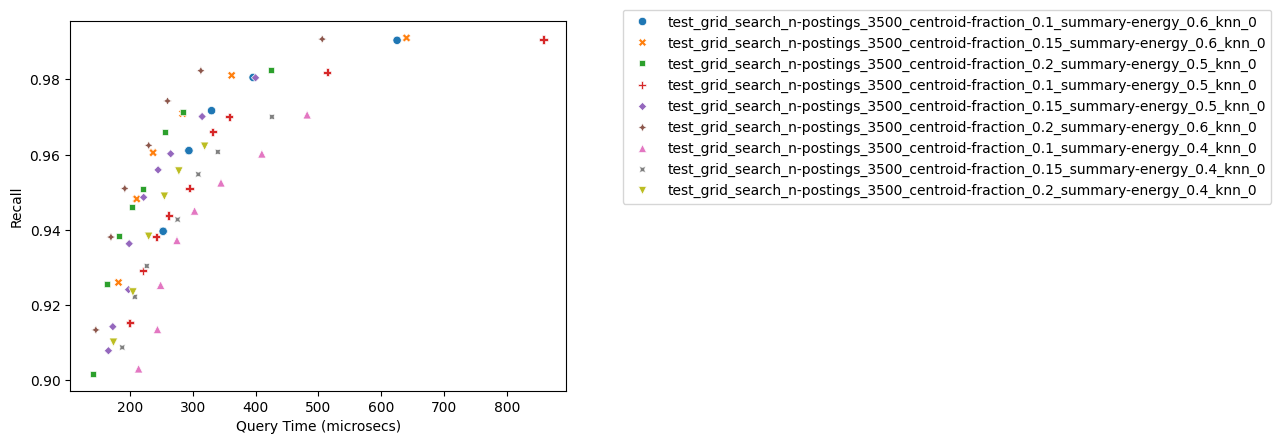

In [42]:
sns.scatterplot(data=all_df, x="Query Time (microsecs)", y="Recall", hue="name", style="name")
plt.legend(bbox_to_anchor=(1.1, 1.05))
